<a href="https://colab.research.google.com/github/12345997/WEEK-9-REPO/blob/main/week_9_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the Question

### a) Specifying the Data Analytic Question
predict the sex type of a person in the data we are provided with

### b) Defining the Metric for Success

### c) Understanding the context
the data was extracted from the titnic dataset

### d) Recording the Experimental Design


### e) Data Relevance


#2.importing the libraries 

In [ ]:
#impporting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Importing datasets
train=pd.read_csv("/content/test (1).csv")
test=pd.read_csv("/content/train (5).csv")


#3.previewing the dataset

In [ ]:
#previewing our dataset
train.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [ ]:
train.tail()

PassengerId  Pclass                          Name  ...      Fare  Cabin  Embarked
413         1305       3            Spector, Mr. Woolf  ...    8.0500    NaN         S
414         1306       1  Oliva y Ocana, Dona. Fermina  ...  108.9000   C105         C
415         1307       3  Saether, Mr. Simon Sivertsen  ...    7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...    8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...   22.3583    NaN         C

[5 rows x 11 columns]

In [ ]:
test.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
test.tail()

PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]

#4.Data cleaning

In [ ]:
#checking for null values
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#filling the Age column with the mean

train["Age"].fillna(train["Age"].mean(), inplace=True)


In [ ]:
#filling the fare column with the mean
train["Fare"].fillna(train["Fare"].mean(), inplace=True)


In [ ]:
#the cabin column had too many missing values hence i droped it
train.drop(["Cabin"],axis=1, inplace=True)


In [ ]:
#i also drpped passenger id because it was important for the analysis
train.drop(["PassengerId"],axis=1, inplace=True)


In [ ]:
#checking null vaues on my test dataset
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#filling the age null values with the mean of the column
test["Age"].fillna(train["Age"].mean(), inplace=True)


In [ ]:
test.drop(["Cabin"],axis=1, inplace=True)


In [ ]:
# Dealing with the Missing Data
#
train.duplicated().sum()


0

In [ ]:
#dropping the the name, embarked and Tckect columns 
train.drop(["Name","Ticket","Embarked"],axis=1, inplace=True)

#checking for outliers

In [ ]:
# Using the IQR formula
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).sum()

Age       36
Fare      55
Parch     94
Pclass     0
Sex        0
SibSp     11
dtype: int64

#5.Exploratory Data Analysis

In [ ]:
# We created a profiling report for our data
!pip install pandas-profiling==2.7.1
#!pip install pandas-profiling==1.4.3

import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(test)
prof


Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# We created a profiling report for our data
!pip install pandas-profiling==2.7.1
#!pip install pandas-profiling==1.y4.3

import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof


Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

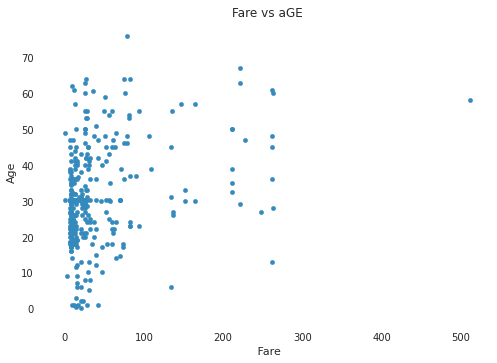

In [ ]:
# Scatter plot between quantity ordered and sales
train.plot(x = 'Fare', y = 'Age', kind='scatter')
plt.title('Fare vs aGE')
plt.xlabel(' Fare')
plt.ylabel('Age')
plt.show()

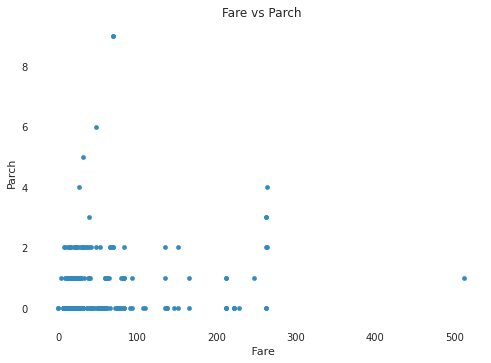

In [ ]:
# Scatter plot between quantity ordered and sales
train.plot(x = 'Fare', y = 'Parch', kind='scatter')
plt.title('Fare vs Parch')
plt.xlabel(' Fare')
plt.ylabel('Parch')
plt.show()

In [ ]:
test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

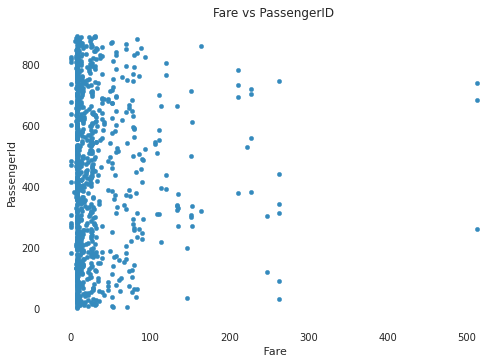

In [ ]:
# Scatter plot between quantity ordered and sales
test.plot(x = 'Fare', y = 'PassengerId', kind='scatter')
plt.title('Fare vs PassengerID')
plt.xlabel(' Fare')
plt.ylabel('PassengerId')
plt.show()

##checking for collinearity

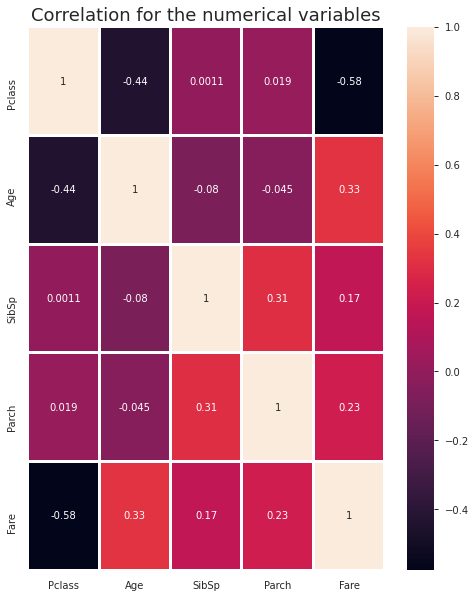

In [ ]:
# We could also use a heatmap to determine the correlation in our data
corr = train.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

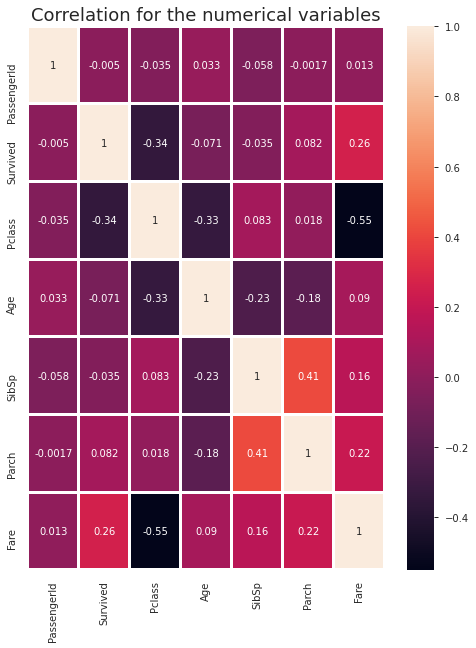

In [ ]:
# We could also use a heatmap to determine the correlation in our data
corr = test.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

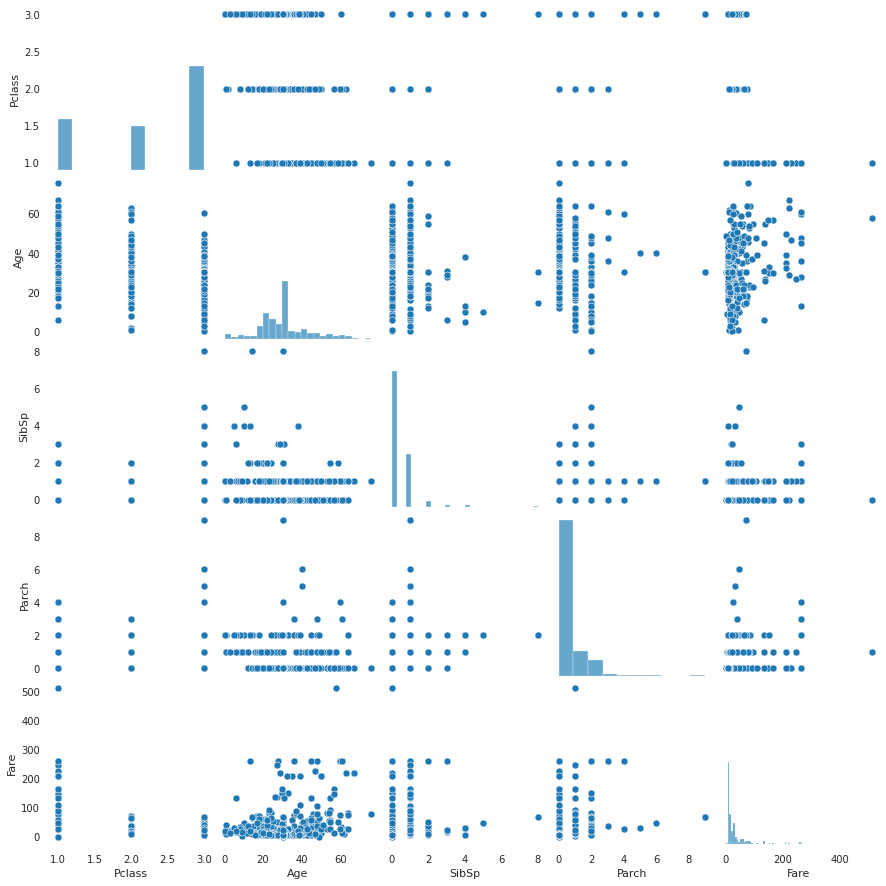

In [ ]:
sns.pairplot(train)
plt.show()

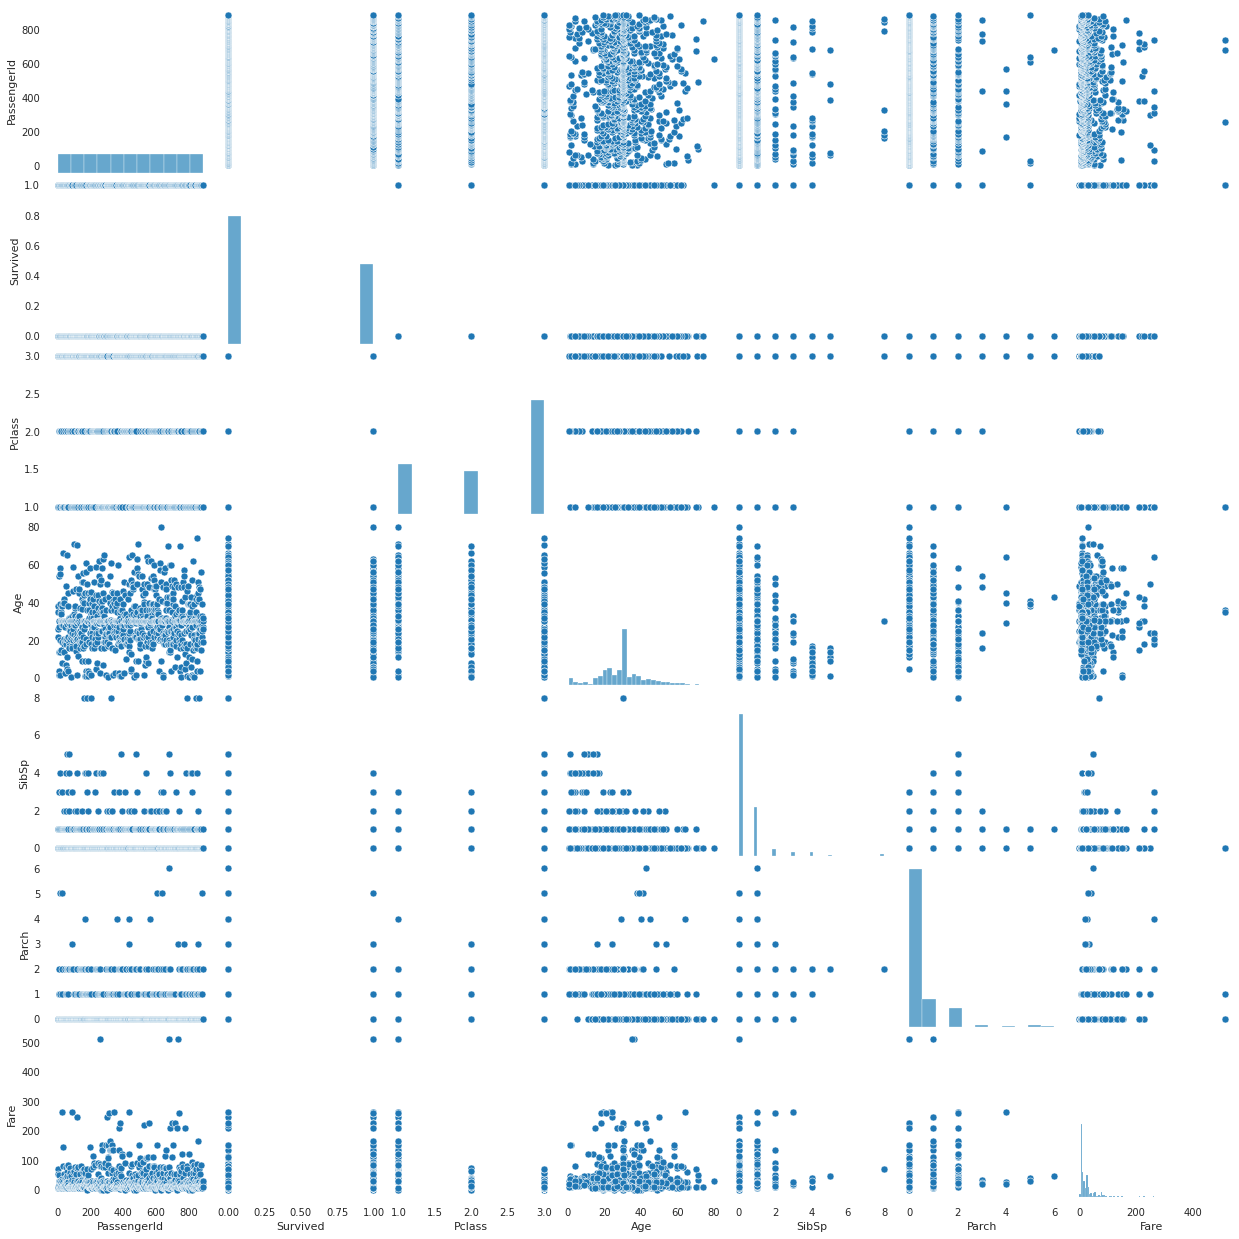

In [ ]:
sns.pairplot(test)
plt.show()

#6.Implementing the solution

In [ ]:
train["Sex"] = np.where(train["Sex"].str.contains("ohc"), 1, 0,)


In [ ]:
train.head()

Pclass  Sex   Age  SibSp  Parch     Fare
0       3    0  34.5      0      0   7.8292
1       3    0  47.0      1      0   7.0000
2       2    0  62.0      0      0   9.6875
3       3    0  27.0      0      0   8.6625
4       3    0  22.0      1      1  12.2875

In [ ]:
# Importing our libraries
# ---
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = train.iloc[:, :2].values
y = train.iloc[:, 3].values

In [ ]:
print(X)

[[3 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [1 0]
 [2 0]
 [1 0]
 [2 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [1 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [2 0]
 [2 0]
 [3 0]
 [3 0]
 [1 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [3 0]
 [2 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [2 0]
 [2 0]
 [1 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [1 0]
 [2 0]
 [3 0]
 [1 0]
 [1 0]
 [1 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [1 0]
 [1 0]
 [3 0]
 [1 0]
 [2 0]
 [3 0]
 [3 0]
 [1 0]
 [1 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [2 0]
 [2 0]
 [3 0]
 [1 0]
 [3 0]
 [1 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [2 0]
 [2 0]
 [3 0]
 [1 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [1 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [2 0]
 [3 0]
 [3 0]
 [3 0]
 [1 0]
 [1 0]

In [ ]:
print(y)

[0 1 0 0 1 0 0 1 0 2 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 2 1 2 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 3 0 4 0 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 0 2 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 5 0 1 0 0 3 0 0
 0 1 0 0 0 0 4 0 0 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 2 8 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 4 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 2 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 2 0 0 1 8 1 0 0 1 1 1 0 0 0
 1 0 0 0 1 0 2 0 0 4 0 0 0 1 0 1 0 0 0 3 0 0 0 0 3 1 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 1 0 0 0 0 0 1]


In [ ]:
# ---
# splitting th dataset into 80,20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#checking for the values of y predict
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26 26  0  0  0]
 [ 9 18  0  0  0]
 [ 1  1  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        52
           1       0.40      0.67      0.50        27
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.52        84
   macro avg       0.21      0.23      0.21        84
weighted avg       0.54      0.52      0.51        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
